In [25]:
import torch
import numpy as np
import tqdm as tqdm
import matplotlib.pyplot as plt
from simulator import simulator



In [26]:
initial_state = torch.tensor([0.0, 0.0, 10.0, 20.0])  # [x0, y0, v_x0, v_y0]
result = simulator(initial_state, t=2)

print(result)

tensor([20.0000, 20.3800, 10.0000,  0.3800])


In [27]:
x0 = torch.tensor([0, 2])
v0 = torch.tensor([10, 10])

x = torch.cat((x0, v0))
y = simulator(x, t=3)

print(y)

tensor([ 30.0000, -12.1450,  10.0000, -19.4300])


In [22]:
all_pos = []
for t in range(100):
    y = simulator(x, t=t/30)
    all_pos.append(y[:2].tolist())



all_pos = np.array(all_pos)

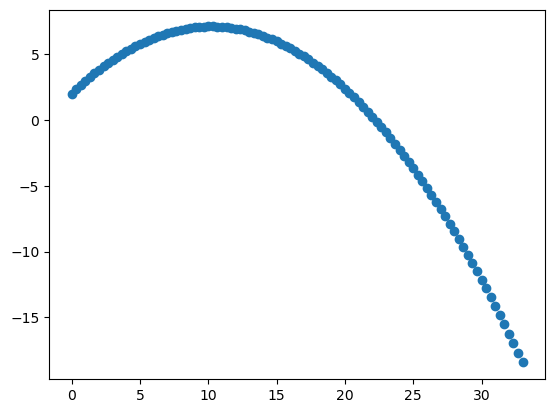

In [23]:
plt.scatter(all_pos[:, 0], all_pos[:, 1])

In [42]:
#all_pos = all_pos.reshape((100,1))
#all_pos.shape

In [20]:
all_pos.shape

(100, 2)

In [44]:
all_pos

array([[ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
       [ 30.        , -12.14500046],
 

$| |A(x) - b| |_2^2$

In [24]:
Ax = simulator(x, t=3)

$\arg \min_x | |A(x) - b| |_2^2$

In [ ]:
x = torch.tensor([0., 0., 0., 0.]), 